# Document Classification Using Ensemble Model

In [2]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from string import punctuation
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [43]:
df=pd.read_json('News_Category_Dataset.json',lines=True)
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [44]:
df['text']=df['headline']+df['short_description']
lst=['category','text']
data=df[lst]
data.head()

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


In [45]:
le=LabelEncoder()
data['Label']=le.fit_transform(data['category'])

In [46]:
data.head(10)

,category,text,Label
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,6
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,10
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,10
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,10
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,10
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,10
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...,10
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...,10
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,10
9,ENTERTAINMENT,What To Watch On Hulu That’s New This WeekYou'...,10


In [9]:
data.shape

(200853, 3)

In [47]:
data.rename(columns={'text':'news'},inplace=True)

# Text Processing

## Stopword removal

In [48]:
data['news'] = data['news'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [49]:
STOPWORDS = set(stopwords.words('english'))
punctuation = list(punctuation)
STOPWORDS.update(punctuation)
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [50]:
data.head()

,category,news,Label
0,CRIME,there were 2 mass shootings in texas last week...,6
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,10
2,ENTERTAINMENT,hugh grant marries for the first time at age 5...,10
3,ENTERTAINMENT,jim carrey blasts 'castrato' adam schiff and d...,10
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...,10


In [51]:
data['news_without_stopwords'] = data['news'].apply(lambda x:' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [52]:
data.head()

,category,news,Label,news_without_stopwords
0,CRIME,there were 2 mass shootings in texas last week...,6,"2 mass shootings texas last week, 1 tvshe left..."
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,10,smith joins diplo nicky jam 2018 world cup's o...
2,ENTERTAINMENT,hugh grant marries for the first time at age 5...,10,hugh grant marries first time age 57the actor ...
3,ENTERTAINMENT,jim carrey blasts 'castrato' adam schiff and d...,10,jim carrey blasts 'castrato' adam schiff democ...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...,10,julianna margulies uses donald trump poop bags...


In [53]:
len(data['news_without_stopwords'][0])

93

In [54]:
data['news_without_stopwords'][0]

'2 mass shootings texas last week, 1 tvshe left husband. killed children. another day america.'

In [55]:
data['news'][0]

'there were 2 mass shootings in texas last week, but only 1 on tvshe left her husband. he killed their children. just another day in america.'

## Stemming

In [40]:
from nltk.stem import WordNetLemmatizer

In [41]:
ps = WordNetLemmatizer()

In [56]:
data['news_porter_stemmed'] = data['news_without_stopwords'].apply(lambda x: ' '.join([ps.lemmatize(word) for word in x.split()]))

In [20]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [57]:
data.head()

,category,news,Label,news_without_stopwords,news_porter_stemmed
0,CRIME,there were 2 mass shootings in texas last week...,6,"2 mass shootings texas last week, 1 tvshe left...","2 mass shooting texas last week, 1 tvshe left ..."
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,10,smith joins diplo nicky jam 2018 world cup's o...,smith join diplo nicky jam 2018 world cup's of...
2,ENTERTAINMENT,hugh grant marries for the first time at age 5...,10,hugh grant marries first time age 57the actor ...,hugh grant marries first time age 57the actor ...
3,ENTERTAINMENT,jim carrey blasts 'castrato' adam schiff and d...,10,jim carrey blasts 'castrato' adam schiff democ...,jim carrey blast 'castrato' adam schiff democr...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...,10,julianna margulies uses donald trump poop bags...,julianna margulies us donald trump poop bag pi...


# remove the punctuation

In [58]:
REMOVE_SPECIAL_CHARACTER = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS = re.compile('[^0-9a-z #+_]')
data['news_porter_stemmed'] = data['news_porter_stemmed'].str.replace(REMOVE_SPECIAL_CHARACTER,'')
data['news_porter_stemmed'] = data['news_porter_stemmed'].str.replace(BAD_SYMBOLS,'')

In [59]:
data.head()

,category,news,Label,news_without_stopwords,news_porter_stemmed
0,CRIME,there were 2 mass shootings in texas last week...,6,"2 mass shootings texas last week, 1 tvshe left...",2 mass shooting texas last week 1 tvshe left h...
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,10,smith joins diplo nicky jam 2018 world cup's o...,smith join diplo nicky jam 2018 world cups off...
2,ENTERTAINMENT,hugh grant marries for the first time at age 5...,10,hugh grant marries first time age 57the actor ...,hugh grant marries first time age 57the actor ...
3,ENTERTAINMENT,jim carrey blasts 'castrato' adam schiff and d...,10,jim carrey blasts 'castrato' adam schiff democ...,jim carrey blast castrato adam schiff democrat...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...,10,julianna margulies uses donald trump poop bags...,julianna margulies us donald trump poop bag pi...


In [24]:
data['news_porter_stemmed'].apply(lambda x: len(x.split(' '))).sum()

3539943

## Low Frequency removal

In [138]:
#freq = pd.Series(' '.join(data['news_porter_stemmed']).split()).value_counts()

In [139]:
#freq1=freq[freq<=3]

In [140]:
#freq1.head()

campsit              3
36year               3
criticallyacclaim    3
gvp                  3
oosthuizen           3
dtype: int64

In [ ]:
#freq2= list(freq1.index.values)
#freq2

In [ ]:
#data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq2)]))

In [60]:
data = data[['category', 'Label', 'news_porter_stemmed']]

In [61]:
data.head()

,category,Label,news_porter_stemmed
0,CRIME,6,2 mass shooting texas last week 1 tvshe left h...
1,ENTERTAINMENT,10,smith join diplo nicky jam 2018 world cups off...
2,ENTERTAINMENT,10,hugh grant marries first time age 57the actor ...
3,ENTERTAINMENT,10,jim carrey blast castrato adam schiff democrat...
4,ENTERTAINMENT,10,julianna margulies us donald trump poop bag pi...


## TF-Idf(Vectorizer)

In [62]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(data['news_porter_stemmed'])
labels = data.Label
features.shape

(200853, 94085)

In [63]:
category_id_df = data[['category', 'Label']].drop_duplicates().sort_values('Label')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Label', 'category']].values)

In [64]:
data.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

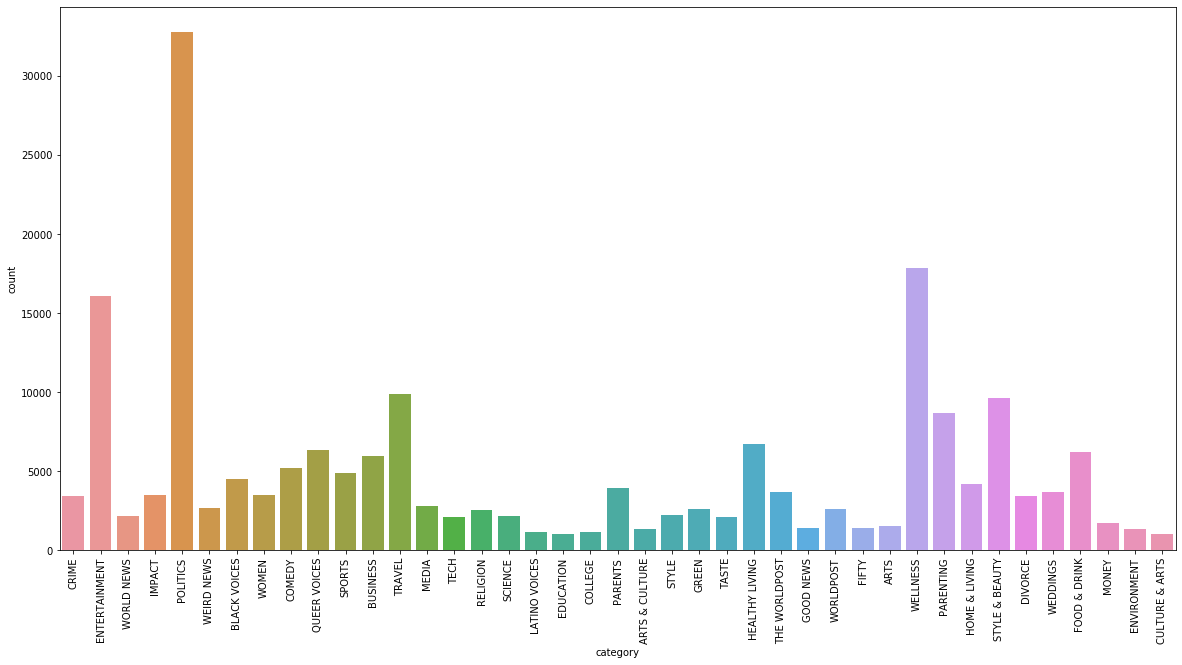

In [65]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['category'],data=data)
plt.xticks(rotation=90)
plt.show()

In [66]:
from sklearn.feature_selection import chi2

N = 3
for newstype, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(newstype))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'ARTS':
  . Most correlated unigrams:
       . artist
       . nighter
       . art
  . Most correlated bigrams:
       . art world
       . stage door
       . first nighter
# 'ARTS & CULTURE':
  . Most correlated unigrams:
       . book
       . art
       . artist
  . Most correlated bigrams:
       . street art
       . margaret atwood
       . handmaids tale
# 'BLACK VOICES':
  . Most correlated unigrams:
       . trayvon
       . racial
       . black
  . Most correlated bigrams:
       . life matter
       . black life
       . black woman
# 'BUSINESS':
  . Most correlated unigrams:
       . qa
       . 247
       . business
  . Most correlated bigrams:
       . business qa
       . 247 wall
       . woman business
# 'COLLEGE':
  . Most correlated unigrams:
       . fraternity
       . campus
       . college
  . Most correlated bigrams:
       . college president
       . higher education
       . college student
# 'COMEDY':
  . Most correlated unigrams:
       . jimmy
      

# Ensemble Model

In [67]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,features,labels, scoring='accuracy',cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [68]:
cv_df.sort_values(by='model_name',ascending=True)

,model_name,fold_idx,accuracy
10,LogisticRegression,0,0.552239
11,LogisticRegression,1,0.571183
12,LogisticRegression,2,0.577382
13,LogisticRegression,3,0.562186
14,LogisticRegression,4,0.549539
5,MultinomialNB,0,0.400363
6,MultinomialNB,1,0.417515
7,MultinomialNB,2,0.428269
8,MultinomialNB,3,0.423799
9,MultinomialNB,4,0.421334


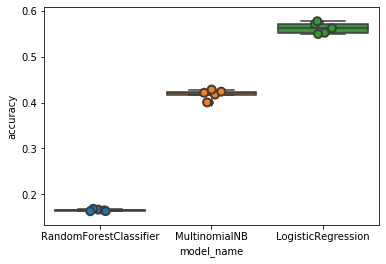

In [69]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,size=8, jitter=True, edgecolor="gray", linewidth=2)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0)

In [71]:
model = LogisticRegression(random_state=0)
model.fit(features,labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
texts = ["new movie is very sweet",
         "online education is the new trend among children",
         "By god's grace he managed to survive",
         "my cricket team is very good",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "a new album, tops the charts in all of south-east Asia!",
         "Mobile phones are very smart than humans",
         "my college might open next week","new dieases are very harmful to our body",
         "Mountains are my favourite place to visit",
         "Cripco to sell it first fully digital work of art in the test of emerging market",
         "you are very funny",'computers are in trend'
         ]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"new movie is very sweet"
  - Predicted as: 'ENTERTAINMENT'

"online education is the new trend among children"
  - Predicted as: 'PARENTING'

"By god's grace he managed to survive"
  - Predicted as: 'RELIGION'

"my cricket team is very good"
  - Predicted as: 'SPORTS'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'POLITICS'

"a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'ENTERTAINMENT'

"Mobile phones are very smart than humans"
  - Predicted as: 'TECH'

"my college might open next week"
  - Predicted as: 'COLLEGE'

"new dieases are very harmful to our body"
  - Predicted as: 'WELLNESS'

"Mountains are my favourite place to visit"
  - Predicted as: 'TRAVEL'

"Cripco to sell it first fully digital work of art in the test of emerging market"
  - Predicted as: 'ARTS'

"you are very funny"
  - Predicted as: 'COMEDY'

"computers are in trend"
  - Predicted as: 'STYLE'



In [96]:
import joblib as jb

In [98]:
jb.dump(model,'model.pkl')

['model.pkl']

In [99]:
input=jb.load('model.pkl')